# [Mid test] - [DA12] 

# [Test 2] - Loan Status Prediction (Logistic Regression ) 

<h1><font color = 'Blue'> Loan Status Prediction <font></h1>

<h2><font color = 'orange'> 1. Problem Definition: <font></h2>
    
* Goal:  Loan Status Prediction
* Dataset: https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data

<h2><font color = 'orange'> 2. Feature Selections: <font></h2>    

* Choose features to train ML model (Feature Engineering)
* Need to use `Feature Engineering` to identify Features needed

<h2><font color = 'orange'> 3. Spliting Datasets <font></h2>    

* `data`: dataset
* `X`: data [feature]
* `y`: target variable `SalePrice`

<h2><font color = 'orange'> 4. Training Machine Learning Model <font></h2>

<h2><font color = 'orange'> 5. Model Evaluation <font></h2>    


In [1]:
#import lib
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

In [2]:
#import data
loan_df = pd.read_csv("https://raw.githubusercontent.com/maxtran1997gmail/Files/main/loan_train.csv")
loan_df

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male
...,...,...,...,...,...,...,...,...,...,...
341,394,394,COLLECTION,800,15,9/11/2016,9/25/2016,32,High School or Below,male
342,395,395,COLLECTION,1000,30,9/11/2016,10/10/2016,25,High School or Below,male
343,397,397,COLLECTION,800,15,9/12/2016,9/26/2016,39,college,male
344,398,398,COLLECTION,1000,30,9/12/2016,11/10/2016,28,college,male


## Metadata - Attribute Information:

**Ta có tổng cộng 10 cột trong dataset tuy nhiên ta sẽ chỉ lấy 8 cột trong dataset**    

This dataset is about past loans. The __loan_train.csv__ data set includes details of 346 customers whose loan are already paid off or defaulted. It includes following fields:

| Field          | Description                                                                           |
|----------------|---------------------------------------------------------------------------------------|
| Loan_status    | Whether a loan is paid off on in collection                                           |
| Principal      | Basic principal loan amount at the                                                    |
| Terms          | Origination terms which can be weekly (7 days), biweekly, and monthly payoff schedule |
| Effective_date | When the loan got originated and took effects                                         |
| Due_date       | Since it’s one-time payoff schedule, each loan has one single due date                |
| Age            | Age of applicant                                                                      |
| Education      | Education of applicant                                                                |
| Gender         | The gender of applicant                                                               |

### Feature Selection với Covariance (Ma trận hiệp phương sai)

In [3]:
loan_df.cov()

,Unnamed: 0,Unnamed: 0.1,Principal,terms,age
Unnamed: 0,13330.945732,13330.945732,410.054453,56.762654,-8.552115
Unnamed: 0.1,13330.945732,13330.945732,410.054453,56.762654,-8.552115
Principal,410.054453,410.054453,11973.946553,456.339114,-40.242104
terms,56.762654,56.762654,456.339114,63.856178,-3.125459
age,-8.552115,-8.552115,-40.242104,-3.125459,36.474566


In [4]:
# Các cột có trong dataframe
loan_df.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'loan_status', 'Principal', 'terms',
       'effective_date', 'due_date', 'age', 'education', 'Gender'],
      dtype='object')

In [5]:
# Review dữ liệu
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346 entries, 0 to 345
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      346 non-null    int64 
 1   Unnamed: 0.1    346 non-null    int64 
 2   loan_status     346 non-null    object
 3   Principal       346 non-null    int64 
 4   terms           346 non-null    int64 
 5   effective_date  346 non-null    object
 6   due_date        346 non-null    object
 7   age             346 non-null    int64 
 8   education       346 non-null    object
 9   Gender          346 non-null    object
dtypes: int64(5), object(5)
memory usage: 27.2+ KB


In [6]:
# thống kê dữ liệu
loan_df.describe(include = "all")

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
count,346.000000,346.000000,346,346.000000,346.000000,346,346,346.000000,346,346
unique,NaN,NaN,2,NaN,NaN,7,23,NaN,4,2
top,NaN,NaN,PAIDOFF,NaN,NaN,9/11/2016,10/10/2016,NaN,High School or Below,male
freq,NaN,NaN,260,NaN,NaN,166,90,NaN,151,294
mean,202.167630,202.167630,NaN,943.641618,22.653179,NaN,NaN,30.939306,NaN,NaN
std,115.459715,115.459715,NaN,109.425530,7.991006,NaN,NaN,6.039418,NaN,NaN
min,0.000000,0.000000,NaN,300.000000,7.000000,NaN,NaN,18.000000,NaN,NaN
25%,107.250000,107.250000,NaN,900.000000,15.000000,NaN,NaN,27.000000,NaN,NaN
50%,204.500000,204.500000,NaN,1000.000000,30.000000,NaN,NaN,30.000000,NaN,NaN
75%,298.750000,298.750000,NaN,1000.000000,30.000000,NaN,NaN,35.000000,NaN,NaN


In [7]:
# Các kiểu dữ liệu
loan_df.dtypes

Unnamed: 0         int64
Unnamed: 0.1       int64
loan_status       object
Principal          int64
terms              int64
effective_date    object
due_date          object
age                int64
education         object
Gender            object
dtype: object

In [8]:
# Xem các biến null
null_data=loan_df.isnull()
for i in null_data.columns.values.tolist():
    print(i)
    print(null_data[i].value_counts())
    print("----------------------------------")

Unnamed: 0
False    346
Name: Unnamed: 0, dtype: int64
----------------------------------
Unnamed: 0.1
False    346
Name: Unnamed: 0.1, dtype: int64
----------------------------------
loan_status
False    346
Name: loan_status, dtype: int64
----------------------------------
Principal
False    346
Name: Principal, dtype: int64
----------------------------------
terms
False    346
Name: terms, dtype: int64
----------------------------------
effective_date
False    346
Name: effective_date, dtype: int64
----------------------------------
due_date
False    346
Name: due_date, dtype: int64
----------------------------------
age
False    346
Name: age, dtype: int64
----------------------------------
education
False    346
Name: education, dtype: int64
----------------------------------
Gender
False    346
Name: Gender, dtype: int64
----------------------------------


**---> Không có biến nào null**

### Data Processing
**Chuyển 'due_date', 'effective_date' sang định dạng date time object**

In [9]:
loan_df['due_date'] = pd.to_datetime(loan_df['due_date'])
loan_df['effective_date'] = pd.to_datetime(loan_df['effective_date'])

**Xóa 2 cột Unnamed**

In [10]:
loan_df = loan_df.drop(['Unnamed: 0','Unnamed: 0.1'],axis=1)

In [11]:
# Loại bỏ các giá trị trùng
loan_df.drop_duplicates(inplace=True)

In [12]:
loan_df.head()

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male


#Thêm thư viện autoML để EDA
!pip install pycaret --user


# EDA
exp1 = setup(data = loan_df, target = 'loan_status', session_id=123 , profile=True)

from pycaret.classification import *


In [15]:
# Các trường hợp nợ trong bộ dataset
loan_df['loan_status'].value_counts()

PAIDOFF       228
COLLECTION     78
Name: loan_status, dtype: int64

260 người đã trả khoản vay đúng hạn trong khi 86 người phải đi thu nợ

In [16]:
# import lib để visualize dữ liệu
import seaborn as sns 
from PIL import Image
print("import done")

import done


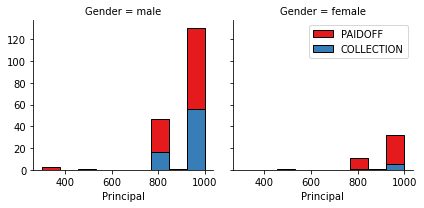

In [18]:
# so sánh dữ liệu giữa người đã trả nợ và người phải đi thu hồi nợ dựa trên cột Principal
bins = np.linspace(loan_df.Principal.min(), loan_df.Principal.max(), 10)
g = sns.FacetGrid(loan_df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Principal', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

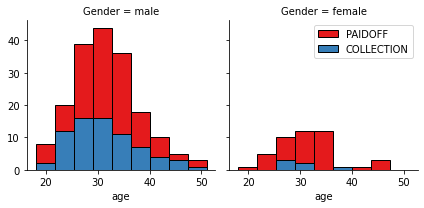

In [19]:
# so sánh dữ liệu giữa người đã trả nợ và người phải đi thu hồi nợ dựa trên tuổi tác

bins = np.linspace(loan_df.age.min(), loan_df.age.max(), 10)
g = sns.FacetGrid(loan_df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

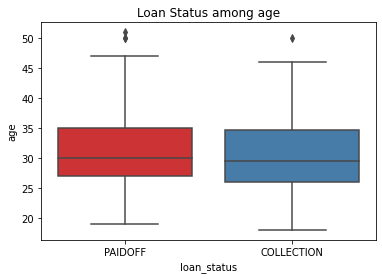

In [20]:
# so sánh phân bố dữ liệu qua boxplot giữa các độ tuổi
sns.boxplot(x='loan_status',y='age',palette="Set1",data=loan_df)
plt.title('Loan Status among age')
plt.show()

sử dụng visual heatmap

### Pre-processing: Feature selection/extraction

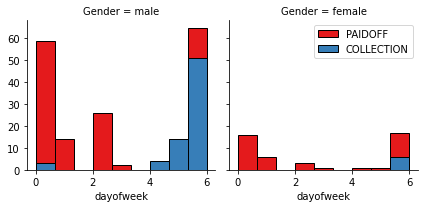

In [21]:
# Ta xem xét thời gian trong tuần khi mọi người nhận khoản vay
loan_df['dayofweek'] = loan_df['effective_date'].dt.dayofweek
bins = np.linspace(loan_df.dayofweek.min(), loan_df.dayofweek.max(), 10)
g = sns.FacetGrid(loan_df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()

Ta thấy rằng những người nhận khoản vay vào cuối tuần không thể trả hết. Do đó ta sẽ dùng Feature binarization để đặt ra giá trị ngưỡng ít hơn sau 4 ngày.
- tạo ra cột 'weekend': = 1 nếu 'dayofweek'>3, else = 0

In [23]:
loan_df['weekend'] = loan_df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)

In [25]:
loan_df

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,0
1,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,0
2,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,0
3,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,1
4,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,1
...,...,...,...,...,...,...,...,...,...,...
340,COLLECTION,1000,30,2016-09-11,2016-11-09,26,college,male,6,1
341,COLLECTION,800,15,2016-09-11,2016-09-25,32,High School or Below,male,6,1
343,COLLECTION,800,15,2016-09-12,2016-09-26,39,college,male,0,0
344,COLLECTION,1000,30,2016-09-12,2016-11-10,28,college,male,0,0


**Chuyển các dữ liệu categorical sang numerical**

* groupby 'Gender' and count by 'loan_status'

In [27]:
loan_df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)

Gender  loan_status
female  PAIDOFF        0.882353
        COLLECTION     0.117647
male    PAIDOFF        0.717647
        COLLECTION     0.282353
Name: loan_status, dtype: float64

* 86.5 % phụ nữ trả khoản nợ còn đàn ông là 73.1 % 

#### Chuyển male và female thành 0 và 1

In [28]:
loan_df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)

In [29]:
loan_df

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0
1,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0
2,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,3,0
3,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1,4,1
4,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0,4,1
...,...,...,...,...,...,...,...,...,...,...
340,COLLECTION,1000,30,2016-09-11,2016-11-09,26,college,0,6,1
341,COLLECTION,800,15,2016-09-11,2016-09-25,32,High School or Below,0,6,1
343,COLLECTION,800,15,2016-09-12,2016-09-26,39,college,0,0,0
344,COLLECTION,1000,30,2016-09-12,2016-11-10,28,college,0,0,0


## One Hot Encoding

* groupby 'education' and count by 'loan_status'

In [30]:
loan_df.groupby(['education'])['loan_status'].value_counts(normalize=True)

education             loan_status
Bechalor              PAIDOFF        0.750000
                      COLLECTION     0.250000
High School or Below  PAIDOFF        0.742188
                      COLLECTION     0.257812
Master or Above       COLLECTION     0.500000
                      PAIDOFF        0.500000
college               PAIDOFF        0.750000
                      COLLECTION     0.250000
Name: loan_status, dtype: float64

#### Feature before One Hot Encoding

In [31]:
loan_df[['Principal','terms','age','Gender','education']].head()

,Principal,terms,age,Gender,education
0,1000,30,45,0,High School or Below
1,1000,30,33,1,Bechalor
2,1000,15,27,0,college
3,1000,30,28,1,college
4,1000,30,29,0,college


**Sử dụng one hot encoding để chuyển đổi các biến categorical thành các biến binary (nhị phân - 0 1) và đưa chúng vào dữ liệu**

* tạo một df với các Feature : `Principal`,`terms`,`age`,`Gender`,`weekend`, `education`
* Sử dụng one hot encoding để chuyển `education` thành các biến nhị phân và bỏ cột `Master or Above`

In [33]:
Feature = loan_df[['Principal','terms','age','Gender','weekend']]
Feature = pd.concat([Feature,pd.get_dummies(loan_df['education'])], axis=1)
Feature.drop(['Master or Above'], axis = 1,inplace=True)
Feature.head()

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


## Feature selection

In [34]:
# Xác định X là đàu vào
X = Feature
X

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1
...,...,...,...,...,...,...,...,...
340,1000,30,26,0,1,0,0,1
341,800,15,32,0,1,0,1,0
343,800,15,39,0,0,0,0,1
344,1000,30,28,0,0,0,0,1


In [35]:
y = loan_df['loan_status'].values

In [36]:
y

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 

## Scaler Data

Tìm Scaler phù hợp để chia tỷ lệ dữ liệu của X (để dự đoán tốt hơn)

In [39]:
X = preprocessing.StandardScaler().fit(X).transform(X)
X

array([[ 0.53003415,  0.97281823,  2.23550031, ..., -0.40980353,
         1.17924764, -0.87098834],
       [ 0.53003415,  0.97281823,  0.29443691, ...,  2.44019373,
        -0.8479983 , -0.87098834],
       [ 0.53003415, -0.89391909, -0.6760948 , ..., -0.40980353,
        -0.8479983 ,  1.14812099],
       ...,
       [-1.24253908, -0.89391909,  1.26496861, ..., -0.40980353,
        -0.8479983 ,  1.14812099],
       [ 0.53003415,  0.97281823, -0.51433951, ..., -0.40980353,
        -0.8479983 ,  1.14812099],
       [ 0.53003415,  0.97281823, -0.83785008, ..., -0.40980353,
        -0.8479983 ,  1.14812099]])

## Classification - PHÂN LOẠI

### Logistic Regression

In [40]:
#import mô hình
from sklearn.linear_model import LogisticRegression

In [41]:
LR = LogisticRegression().fit(X, y)

In [42]:
LR.score(X,y)

0.7647058823529411

In [43]:
yhat_train = LR.predict(X)

## Model Evaluation - đánh giá mô hình

In [44]:
#import thư viện
from sklearn.metrics import f1_score as f1
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss 

### Load Test set for evaluation

In [45]:
test_df = pd.read_csv('https://raw.githubusercontent.com/maxtran1997gmail/Files/main/loan_test.csv')

In [46]:
test_df.head(5)

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1,PAIDOFF,1000,30,9/8/2016,10/7/2016,50,Bechalor,female
1,5,5,PAIDOFF,300,7,9/9/2016,9/15/2016,35,Master or Above,male
2,21,21,PAIDOFF,1000,30,9/10/2016,10/9/2016,43,High School or Below,female
3,24,24,PAIDOFF,1000,30,9/10/2016,10/9/2016,26,college,male
4,35,35,PAIDOFF,800,15,9/11/2016,9/25/2016,29,Bechalor,male


### Processing

In [47]:
test_df['due_date'] = pd.to_datetime(test_df['due_date'])
test_df['effective_date'] = pd.to_datetime(test_df['effective_date'])
test_df['dayofweek'] = test_df['effective_date'].dt.dayofweek
test_df['weekend'] = test_df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
test_df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
Feature_test = test_df[['Principal','terms','age','Gender','weekend']]
Feature_test = pd.concat([Feature_test,pd.get_dummies(test_df['education'])], axis=1)
Feature_test.drop(['Master or Above'], axis = 1,inplace=True)

In [48]:
x_test = Feature_test

In [50]:
Feature_test.head()

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,50,1,0,1,0,0
1,300,7,35,0,1,0,0,0
2,1000,30,43,1,1,0,1,0
3,1000,30,26,0,1,0,0,1
4,800,15,29,0,1,1,0,0


In [51]:
x_test = preprocessing.StandardScaler().fit(x_test).transform(x_test)
x_test

array([[ 0.49362588,  0.92844966,  3.05981865,  1.97714211, -1.30384048,
         2.39791576, -0.79772404, -0.86135677],
       [-3.56269116, -1.70427745,  0.53336288, -0.50578054,  0.76696499,
        -0.41702883, -0.79772404, -0.86135677],
       [ 0.49362588,  0.92844966,  1.88080596,  1.97714211,  0.76696499,
        -0.41702883,  1.25356634, -0.86135677],
       [ 0.49362588,  0.92844966, -0.98251057, -0.50578054,  0.76696499,
        -0.41702883, -0.79772404,  1.16095912],
       [-0.66532184, -0.78854628, -0.47721942, -0.50578054,  0.76696499,
         2.39791576, -0.79772404, -0.86135677],
       [-1.24479571, -0.78854628,  0.19650211, -0.50578054,  0.76696499,
        -0.41702883,  1.25356634, -0.86135677],
       [ 0.49362588, -0.78854628, -1.31937134, -0.50578054,  0.76696499,
        -0.41702883, -0.79772404,  1.16095912],
       [ 0.49362588,  0.92844966,  0.02807173, -0.50578054,  0.76696499,
         2.39791576, -0.79772404, -0.86135677],
       [-0.66532184, -0.78854628

In [52]:
yhat_test = LR.predict(x_test)

### Model Evaluation

In [53]:
yhat_test

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'COLLECTION', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF'], dtype=object)

In [54]:
y_test = test_df['loan_status'].values

In [55]:
accuracy_test = round(accuracy_score(y_test,yhat_test)*100,2)

In [56]:
accuracy = round(accuracy_score(y,yhat_train)*100,2)

In [57]:
print("The train accuracy is",accuracy,"%")

The train accuracy is 76.47 %


In [58]:
print("The test accuracy is",accuracy_test,"%")

The test accuracy is 75.93 %


In [59]:
results = pd.DataFrame({'Algorithm':'Logistic Regression', 'Accuracy Score': accuracy},index=[0])

In [60]:
results

,Algorithm,Accuracy Score
0,Logistic Regression,76.47
